In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential 
from tensorflow.keras.preprocessing.image import ImageDataGenerator



import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
Class_name=os.listdir("../input/emotion-detection-fer/train")
Class_name

['fearful', 'disgusted', 'angry', 'neutral', 'sad', 'surprised', 'happy']

                         ********************************disgusted*************************


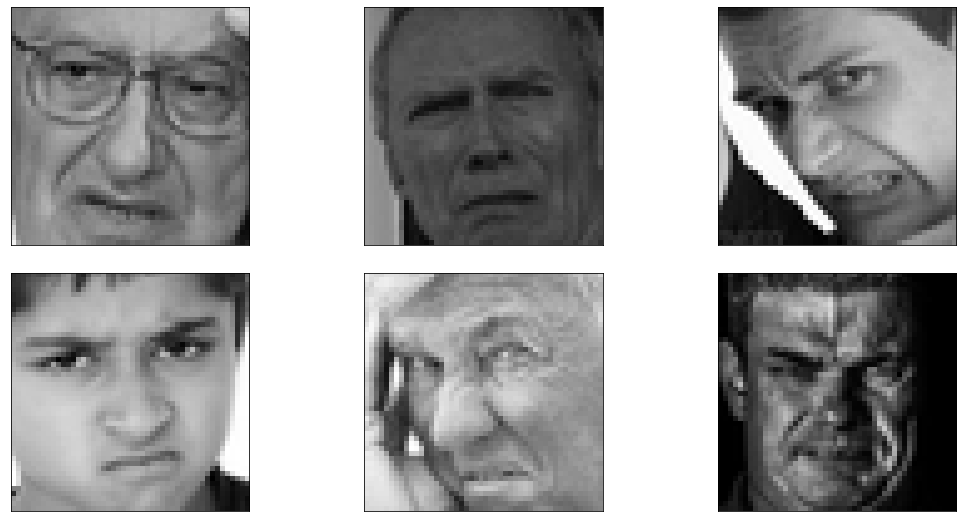

In [5]:
# Plotting 12 images to check dataset
import cv2 as cv
plt.figure(figsize=(15,11))
path = f"../input/emotion-detection-fer/train/{Class_name[1]}"
print(f"                         ********************************{Class_name[1]}*************************")
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.tight_layout()
    rand_img = cv.imread(path +'/'+ np.random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

                         ********************************angry*************************


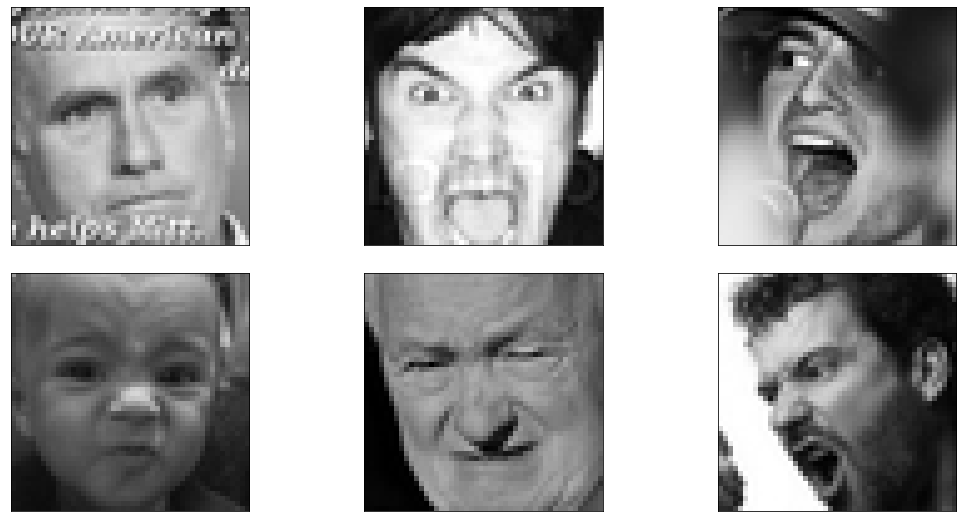

In [6]:
# Plotting 12 images to check dataset
plt.figure(figsize=(15,11))
path = f"../input/emotion-detection-fer/train/{Class_name[2]}"
print(f"                         ********************************{Class_name[2]}*************************")
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.tight_layout()
    rand_img = cv.imread(path +'/'+ np.random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

                         ********************************neutral*************************


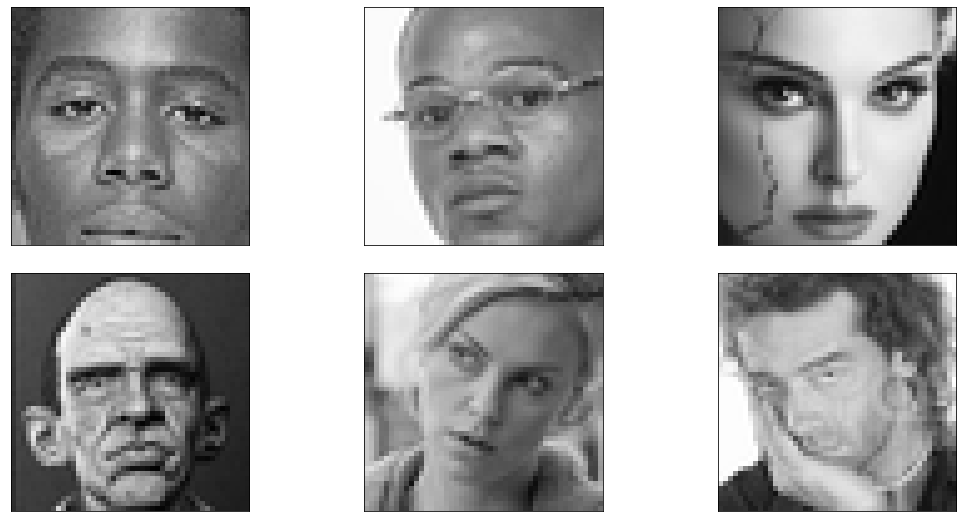

In [7]:
# Plotting 12 images to check dataset
plt.figure(figsize=(15,11))
path = f"../input/emotion-detection-fer/train/{Class_name[3]}"
print(f"                         ********************************{Class_name[3]}*************************")
for i in range(1,7):
    plt.subplot(3,3,i)
    plt.tight_layout()
    rand_img = cv.imread(path +'/'+ np.random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xticks([])
    plt.yticks([])

**distribution of training data before data augmentation**

<BarContainer object of 7 artists>

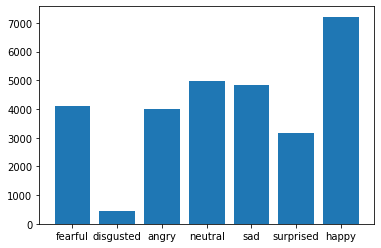

In [8]:
train_count=[]
for i in Class_name:
    train_count.append(len(os.listdir("../input/emotion-detection-fer/train/"+i+"/")))
plt.bar(Class_name,train_count)

In [9]:
root = '../input/emotion-detection-fer'
train_path = os.path.join(root, 'train')

*Here Taken only 400 images because it is taking more time to run the model*

In [10]:
files_train = list()
files_test = list()
emotion_train = list()
emotion_test = list()
for i in os.listdir(train_path):
    path = os.path.join(train_path, i)
    for j in range(400):
        if j<=(0.8*400):
            files_train.append(os.path.join(i, os.listdir(path)[j]))
            emotion_train.append(i)
        else:
            files_test.append(os.path.join(i, os.listdir(path)[j]))
            emotion_test.append(i)

In [11]:
train = pd.DataFrame([files_train, emotion_train]).T
test = pd.DataFrame([files_test, emotion_test]).T
train.columns=['filename', 'class']
test.columns=['filename', 'class']

**Data Augmentation**

In [12]:
train_datagen = ImageDataGenerator(
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         zoom_range = 0.2,
                                         validation_split = 0.2
                                        
                                        )
test_datagen = ImageDataGenerator(rescale = 1./255,
                                        )
train_generator = train_datagen.flow_from_dataframe(dataframe=train,
                                                     directory = train_path,
                                                    target_size = (224,224),
                                                    batch_size = 64,
                                                    class_mode = "categorical"
                                                   )
test_generator = test_datagen.flow_from_dataframe( dataframe=test,
                                                   directory = train_path,
                                                    target_size = (224,224),
                                                    batch_size = 64,
                                                    class_mode = "categorical",
                                                             )

Found 2247 validated image filenames belonging to 7 classes.
Found 553 validated image filenames belonging to 7 classes.


**Vgg16**

In [13]:
tf.keras.backend.clear_session()

from keras.applications.vgg16 import VGG16

image_size = 224

vgg16_base_model = VGG16(weights='imagenet', 
                         include_top=False, 
                         input_shape=(image_size, image_size, 3))

for layer in vgg16_base_model.layers:
    layer.trainable = False

vgg16_pretrained_model = tf.keras.Sequential([
    vgg16_base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])
vgg16_pretrained_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_pretrained_model.summary()

2022-11-04 16:24:09.656396: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-04 16:24:09.657297: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-04 16:24:09.664750: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-04 16:24:09.665504: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-04 16:24:09.666297: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1799      
Total params: 21,139,271
Trainable params: 6,424,583
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history_vgg16 = vgg16_pretrained_model.fit(train_generator, epochs=10, callbacks=callback)

2022-11-04 16:24:24.152598: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-11-04 16:24:27.982511: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


36/36 [==============================] - 67s 1s/step - loss: 2.9482 - accuracy: 0.1651
Epoch 2/10
36/36 [==============================] - 32s 892ms/step - loss: 1.8212 - accuracy: 0.2706
Epoch 3/10
36/36 [==============================] - 31s 863ms/step - loss: 1.7402 - accuracy: 0.3191
Epoch 4/10
36/36 [==============================] - 31s 860ms/step - loss: 1.7062 - accuracy: 0.3342
Epoch 5/10
36/36 [==============================] - 31s 868ms/step - loss: 1.6696 - accuracy: 0.3560
Epoch 6/10
36/36 [==============================] - 31s 862ms/step - loss: 1.6012 - accuracy: 0.3925
Epoch 7/10
36/36 [==============================] - 31s 862ms/step - loss: 1.5727 - accuracy: 0.4117
Epoch 8/10
36/36 [==============================] - 31s 862ms/step - loss: 1.5391 - accuracy: 0.4112
Epoch 9/10
36/36 [==============================] - 31s 859ms/step - loss: 1.5178 - accuracy: 0.4352
Epoch 10/10
36/36 [==============================] - 31s 865ms/step - loss: 1.5068 - accuracy: 0.4219


In [15]:
vgg16_pretrained_model.evaluate(test_generator)

9/9 [==============================] - 12s 1s/step - loss: 1.6034 - accuracy: 0.4087


[1.6034479141235352, 0.40867993235588074]

**InceptionV3**

In [19]:
tf.keras.backend.clear_session()

from keras.applications.inception_v3 import InceptionV3


inception_base_model = InceptionV3(weights='imagenet', 
                         include_top=False, 
                         input_shape=(image_size, image_size, 3))

for layer in inception_base_model.layers:
    layer.trainable = False

inception_pretrained_model = tf.keras.Sequential([
    inception_base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])
inception_pretrained_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
inception_pretrained_model.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               13107456  
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1799      
Total params: 34,912,039
Trainable params: 13,109,255
Non-trainable params: 21,802,784
_________________________________________________________________


In [20]:
history_inception = inception_pretrained_model.fit(train_generator, epochs=10, callbacks=callback)

Epoch 1/10
36/36 [==============================] - 35s 806ms/step - loss: 6.9176 - accuracy: 0.2136
Epoch 2/10
36/36 [==============================] - 30s 823ms/step - loss: 1.8500 - accuracy: 0.2577
Epoch 3/10
36/36 [==============================] - 30s 817ms/step - loss: 1.8250 - accuracy: 0.2733
Epoch 4/10
36/36 [==============================] - 29s 804ms/step - loss: 1.8172 - accuracy: 0.2764
Epoch 5/10
36/36 [==============================] - 30s 818ms/step - loss: 1.7901 - accuracy: 0.2977
Epoch 6/10
36/36 [==============================] - 29s 811ms/step - loss: 1.7760 - accuracy: 0.2991
Epoch 7/10
36/36 [==============================] - 29s 806ms/step - loss: 1.7539 - accuracy: 0.3035
Epoch 8/10
36/36 [==============================] - 30s 807ms/step - loss: 1.7221 - accuracy: 0.3173
Epoch 9/10
36/36 [==============================] - 30s 822ms/step - loss: 1.7220 - accuracy: 0.3142
Epoch 10/10
36/36 [==============================] - 30s 823ms/step - loss: 1.7035 - accura

In [22]:
inception_pretrained_model.evaluate(train_generator)

36/36 [==============================] - 29s 817ms/step - loss: 1.7154 - accuracy: 0.3026


[1.715376853942871, 0.30262571573257446]

**Xception**

In [23]:

tf.keras.backend.clear_session()

from keras.applications.xception import Xception

xception_base_model = Xception(weights='imagenet', 
                         include_top=False, 
                         input_shape=(image_size, image_size, 3))

for layer in xception_base_model.layers:
    layer.trainable = False

xception_pretrained_model = tf.keras.Sequential([
    xception_base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])
xception_pretrained_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
xception_pretrained_model.summary()

83697664/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               25690368  
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 1799      
Total params: 46,553,647
Trainable params: 25,692,167
Non-trainable params: 20,861,480
_________________________________________________________________


In [24]:
history_inception_xception = xception_pretrained_model.fit(train_generator, epochs=10, callbacks=callback)

Epoch 1/10
36/36 [==============================] - 35s 836ms/step - loss: 7.4701 - accuracy: 0.2412
Epoch 2/10
36/36 [==============================] - 31s 858ms/step - loss: 1.9246 - accuracy: 0.3489
Epoch 3/10
36/36 [==============================] - 31s 856ms/step - loss: 1.6392 - accuracy: 0.4255
Epoch 4/10
36/36 [==============================] - 31s 860ms/step - loss: 1.6091 - accuracy: 0.4286
Epoch 5/10
36/36 [==============================] - 31s 867ms/step - loss: 1.4235 - accuracy: 0.4806
Epoch 6/10
36/36 [==============================] - 31s 852ms/step - loss: 1.3690 - accuracy: 0.5047
Epoch 7/10
36/36 [==============================] - 31s 865ms/step - loss: 1.2671 - accuracy: 0.5550
Epoch 8/10
36/36 [==============================] - 31s 858ms/step - loss: 1.2265 - accuracy: 0.5398
Epoch 9/10
36/36 [==============================] - 31s 860ms/step - loss: 1.2820 - accuracy: 0.5318
Epoch 10/10
36/36 [==============================] - 31s 855ms/step - loss: 1.2164 - accura

In [25]:
xception_pretrained_model.evaluate(test_generator)

9/9 [==============================] - 5s 425ms/step - loss: 1.7992 - accuracy: 0.4485


[1.7992080450057983, 0.44846293330192566]

**According to loss and accuracy measures Xception model is giving very good prediction**

*Here Accuracy is very less because we have took very less data* 